In [1]:
# Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing Dataset
d_data = pd.read_csv('diabetes.csv')

In [3]:
# View first few rows
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Summary of DataFrame
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Display summary of statistics 
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Checking for missing values
d_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Column Labels
d_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Number of rows and columns
d_data.shape

(768, 9)

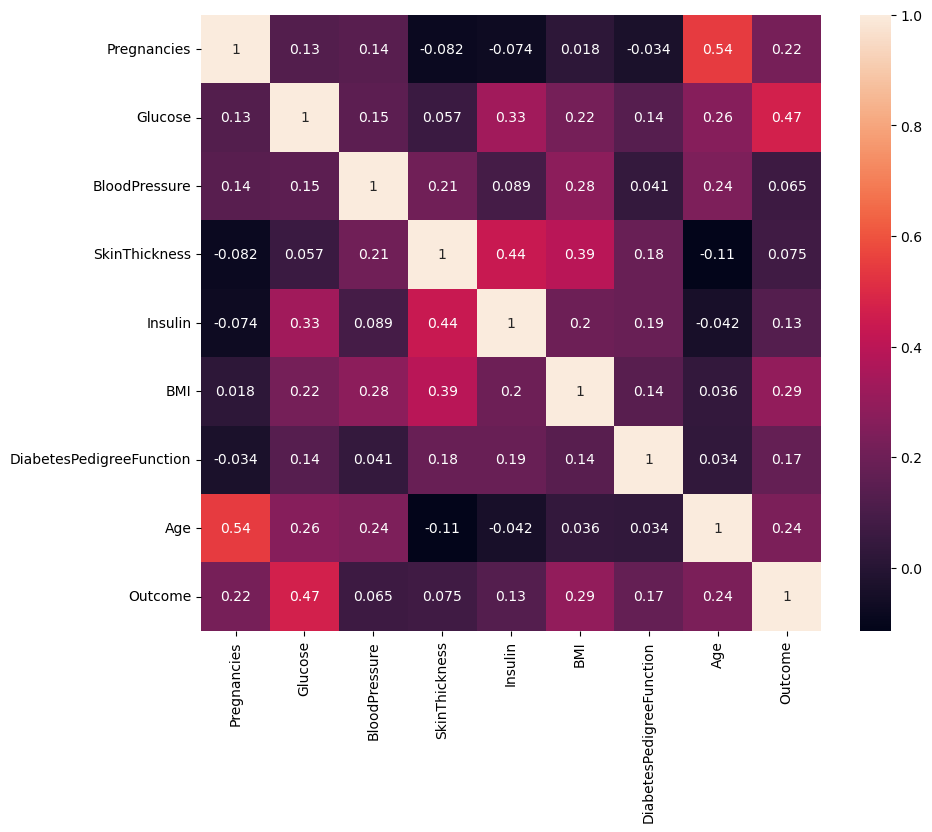

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(d_data.corr(), annot=True, linewidths=0)
plt.show()

In [10]:
# Data Clean replacing all null values

In [11]:
# Columns with null values
col_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Replacing 0 with NaN
for col in col_zero:
    d_data[col].replace(0, np.NAN, inplace=True)

d_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


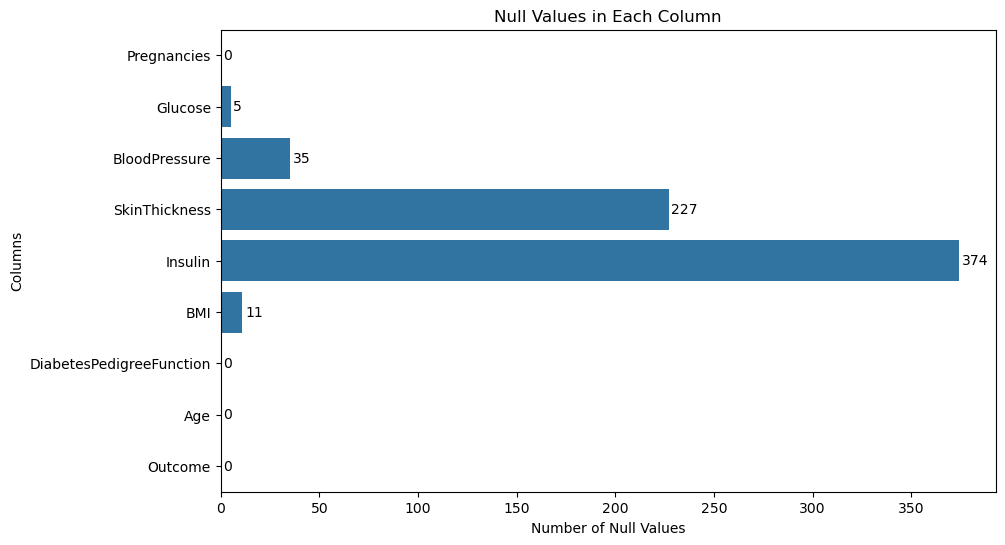

In [12]:
# Visualise null values
plt.figure(figsize=(10,6))
null_plot = sns.barplot(x=d_data.isna().sum(), y=d_data.columns, orient='h')

for value in null_plot.patches:
    null_plot.annotate(text=f'{value.get_width():.0f}', 
    xy=(value.get_width(), value.get_y()+value.get_height()/2), 
    xytext=(2,0), textcoords='offset points', va='center')

plt.title('Null Values in Each Column')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')


plt.show()

In [13]:
# Replacing null values with mean
for col in col_zero:
    d_data[col].replace(np.NAN, d_data[col].mean(), inplace=True)

In [14]:
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# Remove any duplicates
d_data.drop_duplicates()
d_data.shape

(768, 9)

<Figure size 2000x2000 with 0 Axes>

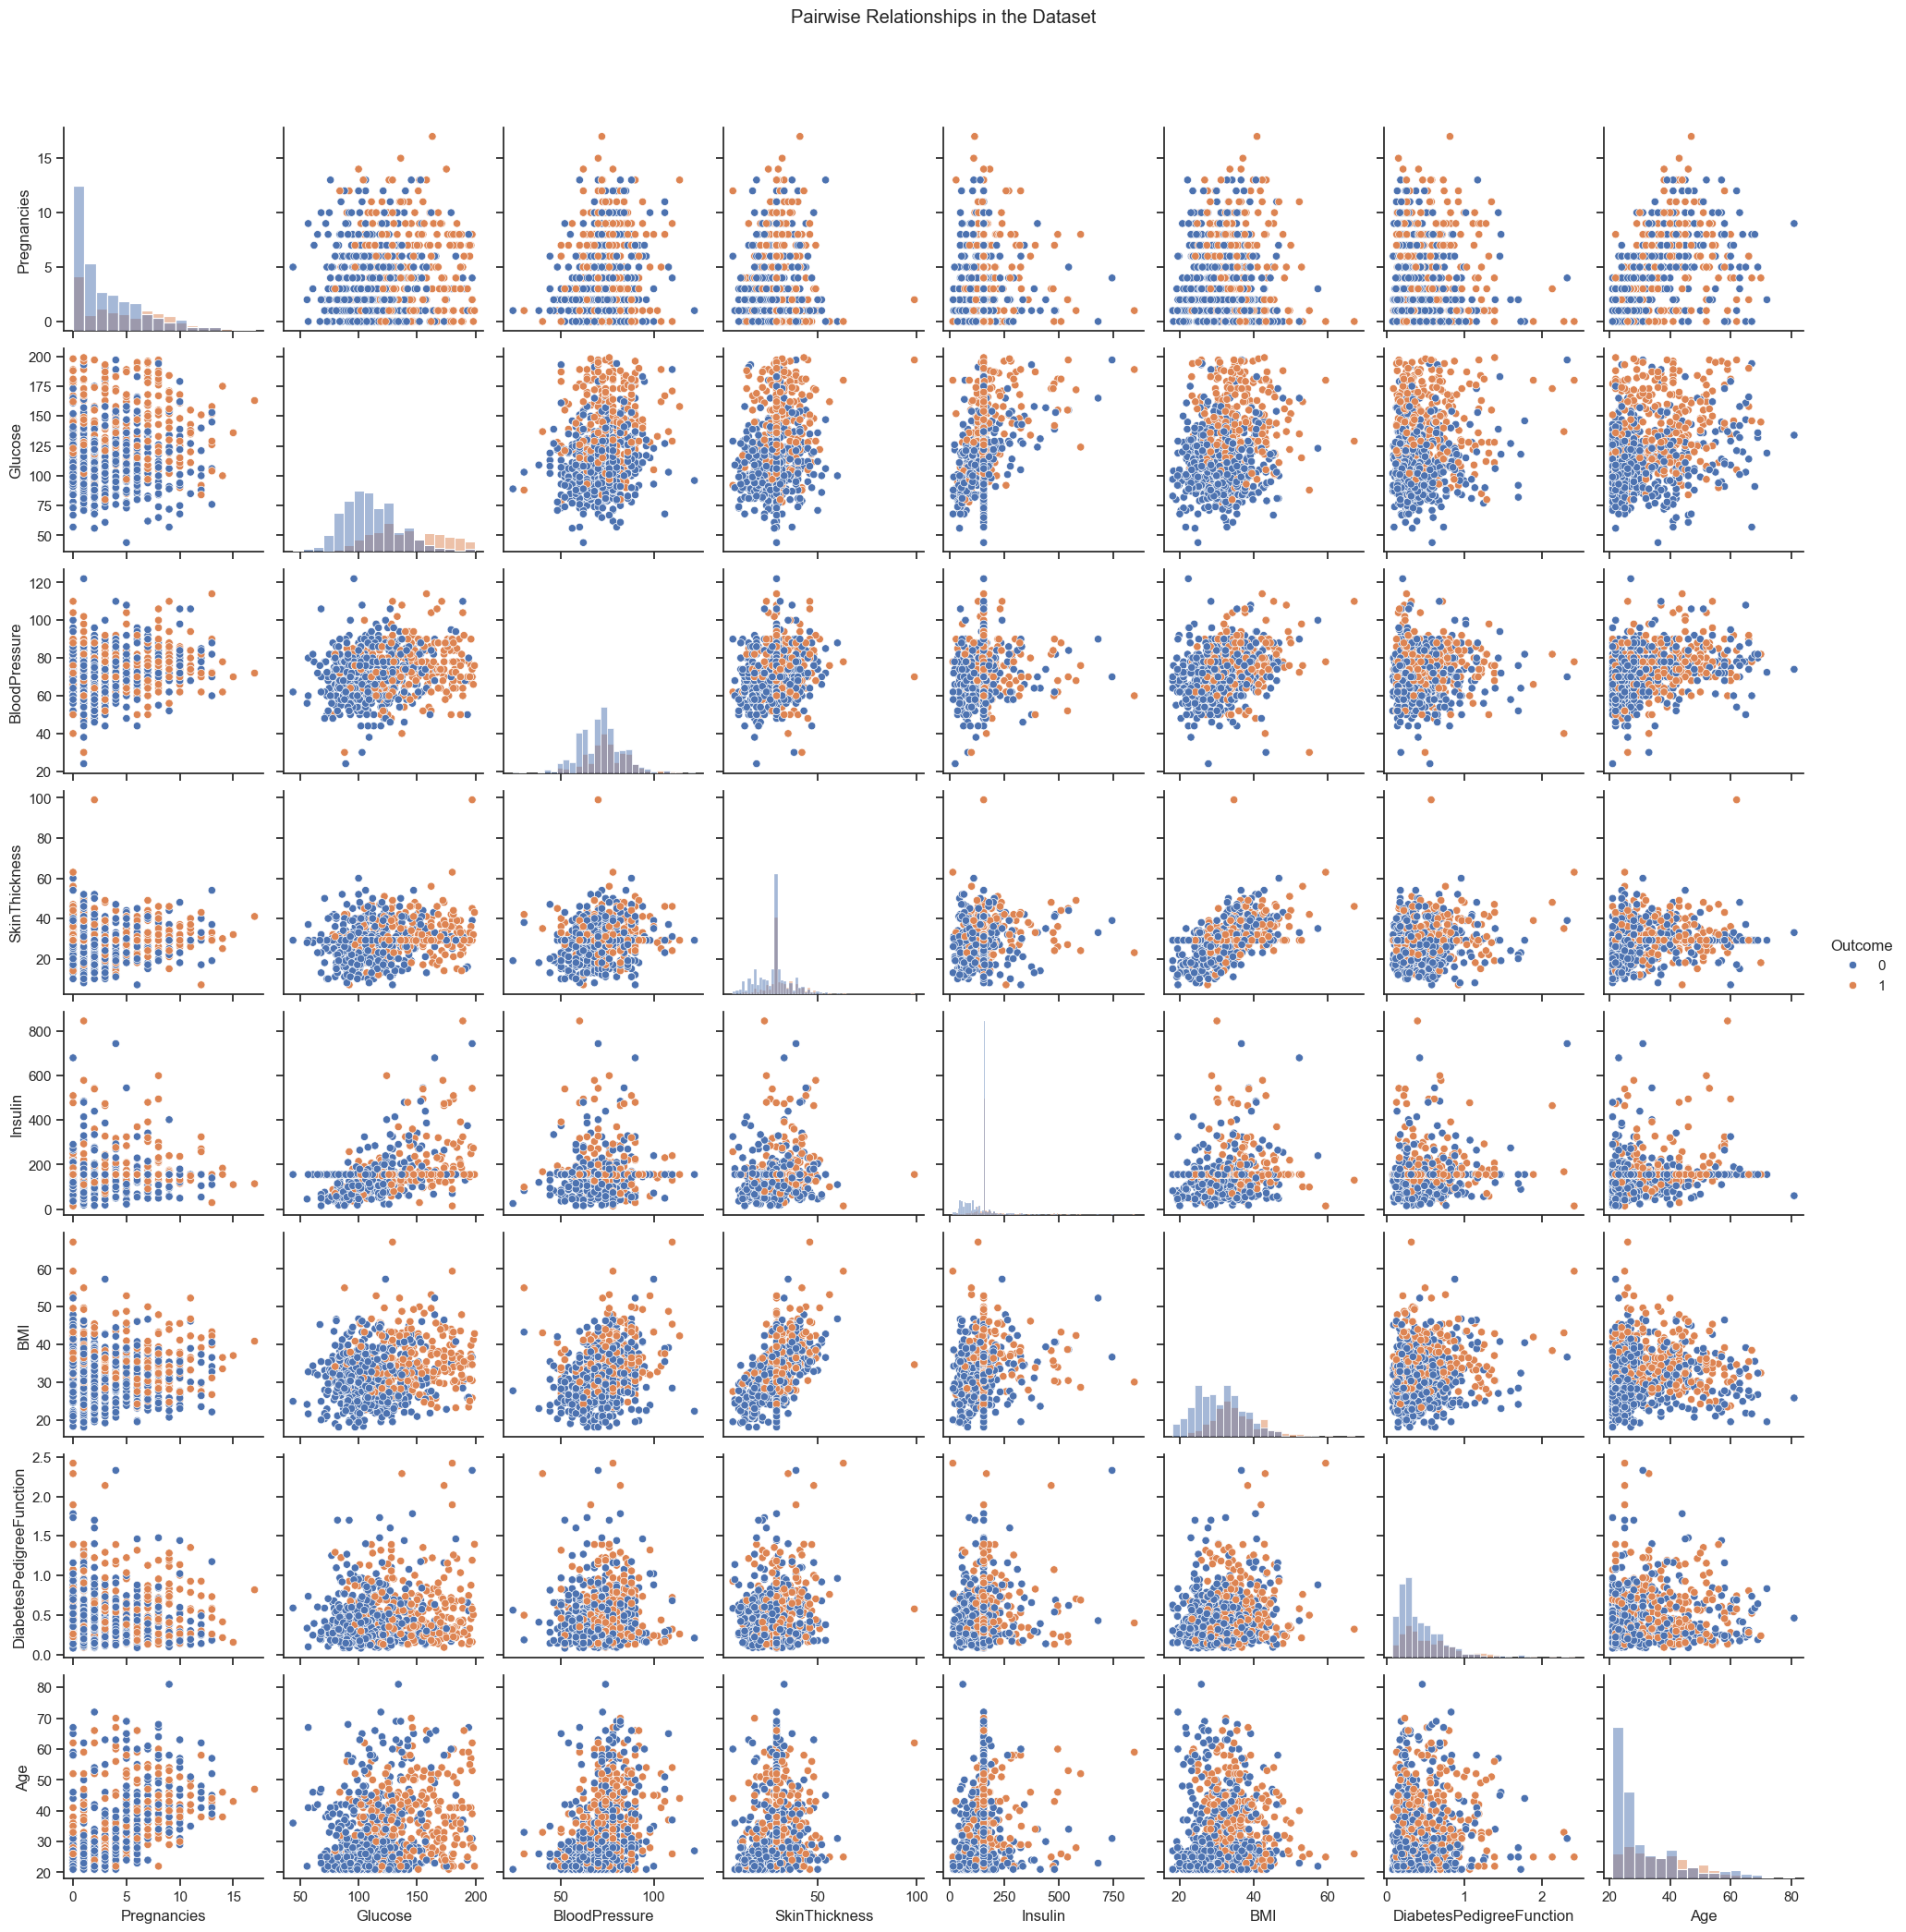

In [16]:
# Relationship with each column
plt.figure(figsize=(20,20))
sns.set(style='ticks')
pair = sns.pairplot(data=d_data, hue='Outcome', diag_kind='hist')
pair.fig.suptitle('Pairwise Relationships in the Dataset', y=1.05)
plt.show()

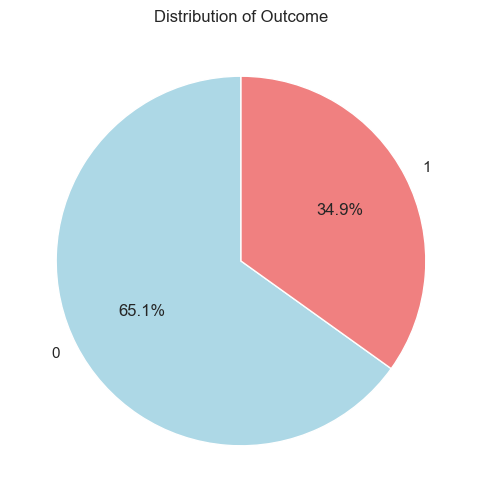

Negative (0): 500
Postive (1): 268


In [17]:
# Check how many diabetes patients and how many non diabetic patients plotting as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(d_data['Outcome'].value_counts(), labels=d_data['Outcome'].value_counts().index, 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Outcome')
plt.show()
N,P = d_data['Outcome'].value_counts()
print(f'Negative (0): {N}')
print(f'Postive (1): {P}')


In [18]:
# Distribution of Age - Negative or Positve in Diabetes
age_cat = pd.crosstab(pd.qcut(d_data['Age'], q=4, labels=['Young', 'MiddleAged', 'Old', 'VeryOld']), d_data['Outcome'])
age_cat.columns = ['Negative', 'Positive']

age_cat

,Negative,Positive
Age,,
Young,188,31
MiddleAged,124,53
Old,105,95
VeryOld,83,89


In [19]:
# Spliting dataframe into x and y and scaling
scaler = StandardScaler()
X = d_data.drop('Outcome', axis=1)
y = d_data.loc[:, 'Outcome']
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, shuffle = True, random_state = 0)

In [21]:
X_train.shape

(614, 8)

In [22]:
y_train.shape

(614,)

In [23]:
X_test.shape

(154, 8)

In [24]:
y_test.shape

(154,)

In [25]:
def display_confusionMatrix(y_test, PredictY):
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, PredictY)
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, PredictY)
    # Create a heatmap of the confusion matrix with annotations
    sns.heatmap(cm, annot=True, fmt='d')
    # Set the title of the plot with the accuracy and labels
    plt.title(f'Accuracy: {accuracy:0.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    # Display the plot
    plt.show()
    
    # Return the calculated accuracy
    return accuracy


def classification(classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # Fit the classifier model on the training data
    classifier.fit(X_train, y_train)
    # Make predictions on the test data
    PredictY = classifier.predict(X_test)
    # Display confusion matrix and get accuracy score
    acc_score = display_confusionMatrix(y_test, PredictY)
    # Print the classification report
    print(classification_report(y_test, PredictY))
    
    # Return the accuracy score
    return acc_score


LogisticRegression()
<class 'sklearn.linear_model._logistic.LogisticRegression'>


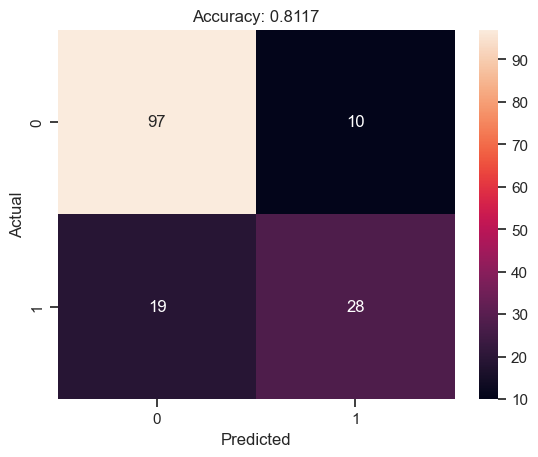

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



In [26]:
lr = LogisticRegression()
print(lr)
print(type(lr))
lr_acc = classification(lr)

KNeighborsClassifier()
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>


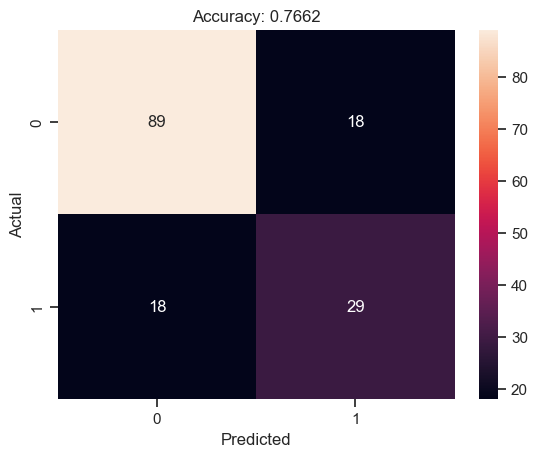

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       107
           1       0.62      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154



In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)
print(type(knn))
knn_acc = classification(knn)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2023-11-24 08:57:56.899143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# Create a sequential model
model = Sequential()
# Add a dense (fully connected) layer with 64 neurons, ReLU activation function,
# and input shape of (8,) for the first layer
model.add(Dense(64, activation='relu', input_shape=(8,)))
# Add another dense layer with 32 neurons and ReLU activation function
model.add(Dense(32, activation='relu'))
# Add another dense layer with 16 neurons and ReLU activation function
model.add(Dense(16, activation='relu'))
# Add the output layer with 1 neuron and a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

2023-11-24 08:58:00.144927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
# Compile the model with specific configuration
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Train the model on the training data with validation split and Evaluate the trained model on the test data
history = model.fit(X_train,y_train, epochs=20, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Loss {loss:.4f}, Test Accuracy {accuracy:.4f}')

Epoch 1/20
16/16 [==============================] - 1s 10ms/step - loss: 0.6728 - accuracy: 0.5947 - val_loss: 0.6331 - val_accuracy: 0.7886
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7780 - val_loss: 0.5553 - val_accuracy: 0.7642
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7841 - val_loss: 0.4908 - val_accuracy: 0.7642
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7739 - val_loss: 0.4639 - val_accuracy: 0.7886
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.7739 - val_loss: 0.4630 - val_accuracy: 0.7967
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.7902 - val_loss: 0.4659 - val_accuracy: 0.7967
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.7882 - val_loss: 0.4637 - val_accuracy: 0.7886
Epoch 8/20
16/16 [=

In [32]:
# Make predictions on the test data using the trained model
prediction = model.predict(X_test)

5/5 [==============================] - 0s 744us/step


In [33]:
# Convert predicted probabilities to binary predictions using a threshold of 0.5
prediction_binary = (prediction > 0.5).astype(int)

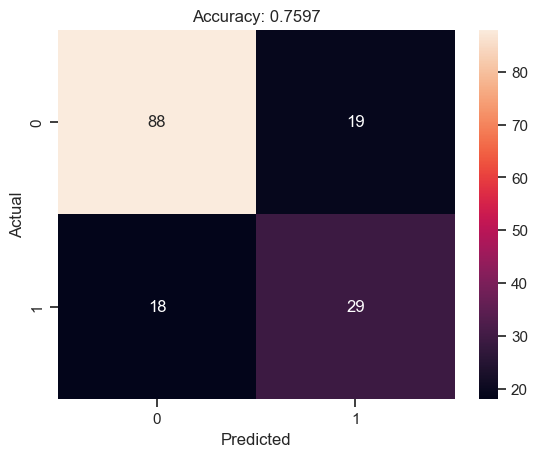

Test Accuracy: 0.7597
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.60      0.62      0.61        47

    accuracy                           0.76       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



In [34]:
# Calculate accuracy and display confusion matrix using the predicted binary values
accuracy = display_confusionMatrix(y_test, prediction_binary)
print(f'Test Accuracy: {accuracy:.4f}')
print(classification_report(y_test, prediction_binary))

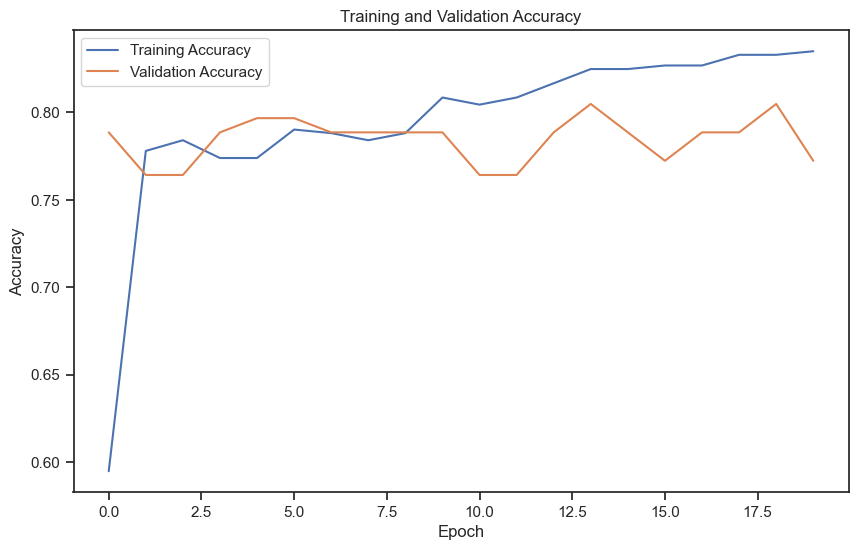

In [35]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()